<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/uciml/adult-census-income">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

## Step 0: Load libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


import os
from pathlib import Path
import time
from collections import OrderedDict, namedtuple

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [4]:
if IN_COLAB:

    from google.colab import drive
    drive.mount('/drive', force_remount=True)
    datadir = '/drive/My Drive/Colab Notebooks/Datasets/'
    optim_dir = datadir + '/optim_dir/'
    results_folder = datadir+'/results/UCI/'
    Path(results_folder).mkdir(parents=True, exist_ok=True)
    Path(optim_dir).mkdir(parents=True, exist_ok=True)
else:
  results_folder = 'results'
  optim_dir = 'optim_dir'
  Path("results").mkdir(parents=True, exist_ok=True)
  Path(optim_dir).mkdir(parents=True, exist_ok=True)


# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

Mounted at /drive


In [5]:
import sys

!pip install category_encoders
import category_encoders as ce

if IN_COLAB:
  
  scripts_dir = '/drive/My Drive/Colab Notebooks/scripts/'
  sys.path.insert(1, scripts_dir)
# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

# insert at 1, 0 is the script path (or '' in REPL)
else:
    sys.path.insert(1, 'scripts')
from geneticalgorithm import geneticalgorithm as ga
import pickle

     |████████████████████████████████| 80 kB 7.4 MB/s 


In [6]:
# Set random seed
seed = 777
# torch.manual_seed(seed)
model = None

import random
def seeding(SEED):
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    os.environ['TF_CUDNN_DETERMINISTIC'] = str(SEED)
    # tf.random.set_seed(SEED)
    print('seeding done!!!')
seeding(seed)

seeding done!!!


In [7]:
import os

os. getcwd()

'/content'

In [8]:
# Importing dataset
dataset = pd.read_csv(f"{datadir}UCI/Adult/adult.csv")
# dataset = pd.read_csv('adult.csv')

## Step 1: Descriptive analysis

In [9]:
# Preview dataset
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32561 Columns: 15


In [11]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [13]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [14]:
# Check for '?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [15]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

## Step 3: Data Preprocessing

### 3.1: Fixing '?' values in the dataset

In [16]:
dataset = dataset.replace('?', np.nan)

In [17]:
# Checking null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [18]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [19]:
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

### 3.2: Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

### 3.3: Feature Selection

In [22]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [24]:
selector.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [25]:
feature_imp = selector.feature_importances_

In [26]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [28]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

### 3.4: Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [31]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [33]:
ros.fit(X, Y)

RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto')

In [34]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

### 3.6: Creating a train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [36]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


## Step 4: Data Modelling

### 4.6: Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [38]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
Y_pred_ran_for = ran_for.predict(X_test)

## Step 5: Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [41]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.6
F1 score: 92.93


## Step 6: Hyperparameter Tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [44]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [45]:
rf_tuned = RandomForestClassifier(random_state=42)

In [46]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [47]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [48]:
rf_cv.best_score_

0.9131271105332539

In [49]:
rf_cv.best_params_

{'max_depth': 102, 'n_estimators': 40}

In [50]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [51]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=102, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
Y_pred_rf_best = rf_best.predict(X_test)

In [53]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.77
F1 score: 93.08


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

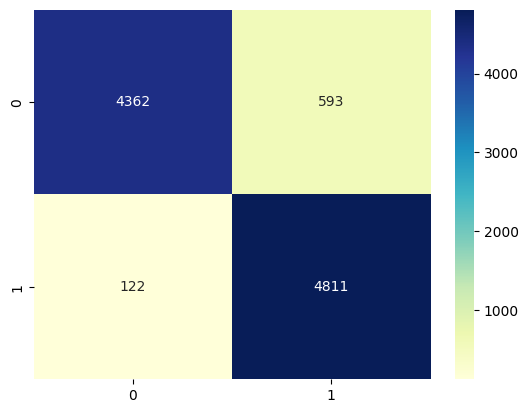

In [55]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4955
           1       0.89      0.98      0.93      4933

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.
</p></li>    

<li><p style="font-family:verdana;">
A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.77 and f1 score of 93.08.
</p></li>    

</ul>

</div>

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Future work:</h3>

<ul>
        
<li><p style="font-family:verdana;">
We have a large enough dataset, so we can use neural networks such as an artificial neural network to build a model which can result in better performance.
</p></li>    

</ul>

</div>

In [56]:
rf_best.